# Usage example: Euler characteristic surfaces

This notebook provides usage examples for the `euchar.curve` module.

- Euler characteristic surfaces of 2D and 3D images with values sampled from uniform distributions.
- Euler characteristic surfaces of finite point sets in $\mathbb{R}^2$ and $\mathbb{R}^3$, obtained using bifiltrations resulting from the combination of the Alpha filtration and the filtration induced by an estimate of the density at points.

***

In [1]:
import numpy as np
import euchar.utils
from euchar.surface import images_2D, images_3D, bifiltration
from euchar.filtrations import (alpha_filtration_2D, alpha_filtration_3D, 
                                inverse_density_filtration)
from euchar.display import matplotlib_plot, euler_surface_plot

***
## Synthetic data

Images

In [2]:
np.random.seed(0)
m = 32
max_intensity = 256

img1_2D = np.random.randint(0, max_intensity, size=(m, m))
img2_2D = np.random.randint(0, max_intensity, size=(m, m))
img1_3D = np.random.randint(0, max_intensity, size=(m, m, m))
img2_3D = np.random.randint(0, max_intensity, size=(m, m, m))

Finite point sets

In [3]:
np.random.seed(0)
N = 100
points_2D = np.random.rand(N, 2)
points_3D = np.random.rand(N, 3)

***
## Euler characteristic curves of 2D and 3D image

For the following computation, the `vector_2D_changes` is automatically computed by `images_2D()`.

In [4]:
ecs_2D = images_2D(img1_2D, img2_2D)

To avoid recomputing it every time, it can be passed as a parameter to `images_2D()`. 

Precompute it with

    vector_2D_changes = euchar.utils.vector_all_euler_changes_in_2D_images()

For the following computation, the vector of all possible Euler changes in the case of 3D images needs to be precomputed and saved to a file.

For example one could do this by running

    vector_3D_changes = euchar.utils.vector_all_euler_changes_in_3D_images()
    np.save("vector_3D_changes.npy", vector_3D_changes)

In [5]:
vector_3D_changes = np.load("vector_3d_changes.npy")
ecs_3D = images_3D(img1_3D, img2_3D, vector_3D_changes)

We can then plot the Euler characteristic surfaces as contour plots.

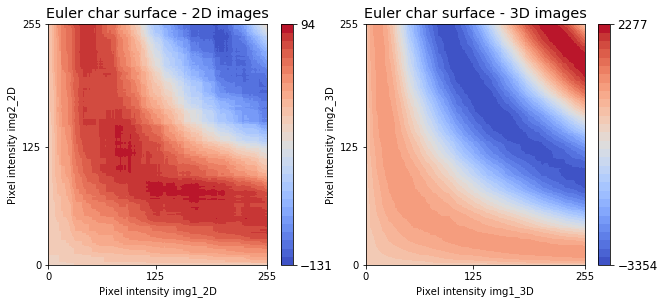

In [6]:
fig, ax = matplotlib_plot(1, 2, figsize=(4.5,4))
domain = np.arange(256)
euler_surface_plot(fig, ax[0], domain, domain, ecs_2D, 
                   xlabel="Pixel intensity img1_2D", 
                   ylabel="Pixel intensity img2_2D",
                   xticks=[0, 125, 255], yticks=[0, 125, 255],
                   title="Euler char surface - 2D images")
euler_surface_plot(fig, ax[1], domain, domain, ecs_3D, 
                   xlabel="Pixel intensity img1_3D", 
                   ylabel="Pixel intensity img2_3D",
                   xticks=[0, 125, 255], yticks=[0, 125, 255],
                   title="Euler char surface - 3D images")

***
## Euler characteristic surfaces of finite point sets

We obtain the bifiltrations in the form of arrays of indices of `points_2D` and `points_3D`.

In [7]:
simplices_2D, alpha_2D = alpha_filtration_2D(points_2D)
density_2D = inverse_density_filtration(points_2D, simplices_2D, n_neighbors=6)
simplices_3D, alpha_3D = alpha_filtration_3D(points_3D)
density_3D = inverse_density_filtration(points_3D, simplices_3D, n_neighbors=6)

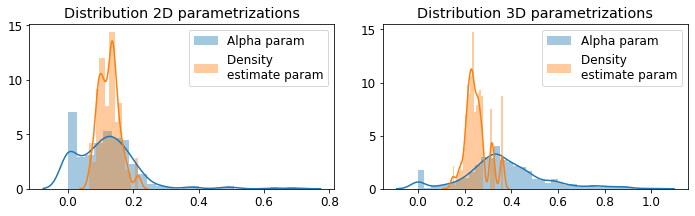

In [8]:
from seaborn import distplot
fig, ax = matplotlib_plot(1, 2, figsize=(5,3))

_ = distplot(alpha_2D, label="Alpha param", ax=ax[0])
_ = distplot(density_2D, label="Density \nestimate param", ax=ax[0])
ax[0].set(title="Distribution 2D parametrizations"); ax[0].legend()

_ = distplot(alpha_3D, label="Alpha param", ax=ax[1])
_ = distplot(density_3D, label="Density \nestimate param", ax=ax[1])
ax[1].set(title="Distribution 3D parametrizations"); ax[1].legend();

We produce arrays `bins1_2D`, `bins2_2D` and `bins1_3D`, `bins2_3D`, used to discretize the domains of the distributions of 2D and 3D parametrizations.

In [9]:
bins1_2D = np.linspace(0.0, 0.25, num=200)
bins2_2D = np.linspace(0.0, 0.8,  num=200)
bifilt_2D = bifiltration(simplices_2D, density_2D, alpha_2D,
                           bins1_2D, bins2_2D)

In [10]:
bins1_3D = np.linspace(0.0, 0.4,  num=200)
bins2_3D = np.linspace(0.0, 1, num=200)
bifilt_3D = bifiltration(simplices_3D, density_3D, alpha_3D,
                           bins1_3D, bins2_3D)

Again we plot the obtained Euler characteristic surfaces as contour plots.

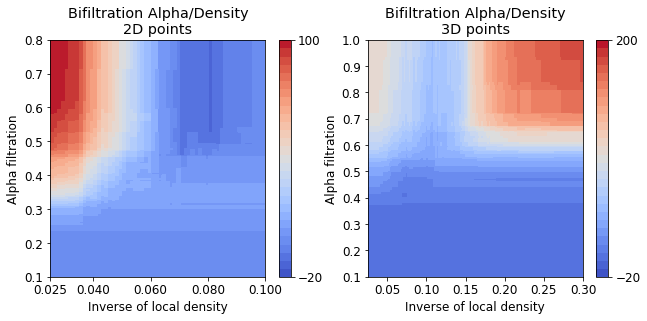

In [11]:
fig, ax = matplotlib_plot(1,2, figsize=(4.5,4))

euler_surface_plot(fig, ax[0], bins1_2D, bins2_2D, bifilt_2D,
                   min_level=-20, max_level=100, 
                   xlim=[0.025, 0.1], ylim=[0.1, 0.8],
                   xticks=[0.025, 0.02, 0.04, 0.06, 0.08, 0.10], 
                   yticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
                   xlabel="Inverse of local density",
                   ylabel="Alpha filtration",
                   title="Bifiltration Alpha/Density\n2D points")

euler_surface_plot(fig, ax[1], bins1_3D, bins2_3D, bifilt_3D,
                   min_level=-20, max_level=200, 
                   xlim=[0.025, 0.30], ylim=[0.1, 1],
                   xticks=[0.05, 0.10, 0.15, 0.20, 0.25, 0.30], 
                   yticks=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                   xlabel="Inverse of local density", 
                   ylabel="Alpha filtration",
                   title="Bifiltration Alpha/Density\n3D points")

**Note.** The last column of these Euler characteristic surfaces is equal to the Euler characteristic curve of the Alpha filtration of the same points.